# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and Explore the Dataset

In [ ]:
csv, excel,

In [2]:
# Load dataset (replace with your local path or URL)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data" 
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df = pd.read_csv(url, header=None, names=columns)

# Check first 5 rows
print(df.head())

# Check missing values
print(df.isnull().sum())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Step 3: Preprocess Data

In [5]:
# Encode all categorical columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("class", axis=1)
y = df["class"]  # 0 = edible, 1 = poisonous

# Step 4: Split Data into Train and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 5: Train Random Forest Model

In [7]:
# Initialize Random Forest with key parameters
rf = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Maximum depth of trees
    max_features="sqrt",       # Features to consider at each split
    min_samples_split=2,       # Minimum samples to split a node
    min_samples_leaf=1,        # Minimum samples at a leaf node
    bootstrap=True,            # Use bootstrap samples
    random_state=42
)



In [8]:
# Train the model
rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, random_state=42)

In [9]:
# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Step 6: Visualize Feature Importance

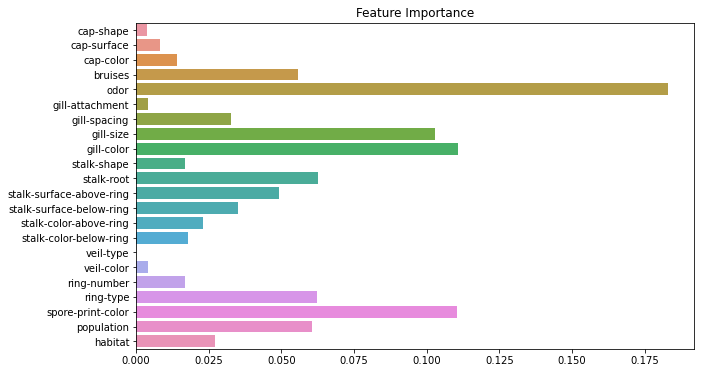

In [10]:
# Plot feature importance
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

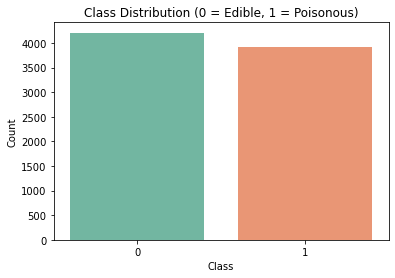

In [11]:
sns.countplot(x="class", data=df, palette="Set2")
plt.title("Class Distribution (0 = Edible, 1 = Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
 # If one class dominates (e.g., more edible mushrooms), the model may be biased.

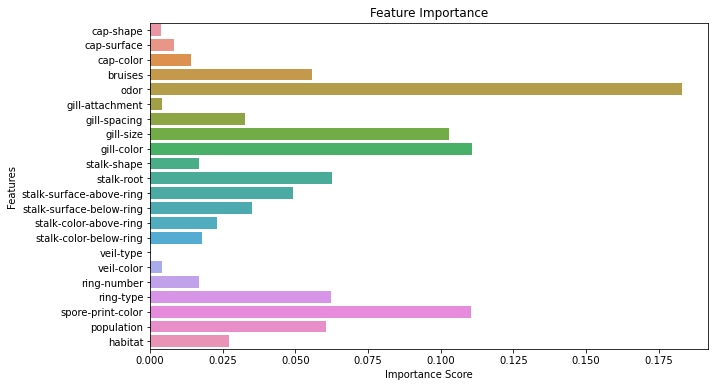

In [12]:
# Feature Importance (Bar Chart)- Identify which features (e.g., odor, gill color) most influence predictions.
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

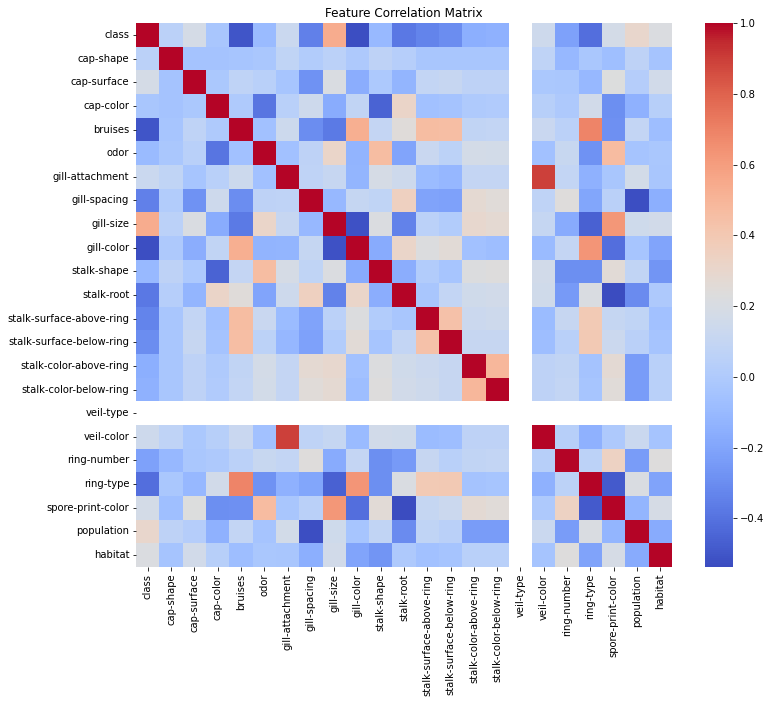

In [13]:
# Correlation Matrix (Heatmap)
# Detect relationships between numerical features
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
>> A heatmap showing correlations.
>> Remove highly correlated features.